<h2>Import Library</h2>

In [648]:
#Data Exploration
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-Processing
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Model Evaluation and Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from pdpbox import pdp

<h2>Data Exploration</h2>

In [649]:
#Read csv Data
df_clarity_underwriting_variables = pd.read_csv('clarity_underwriting_variables.csv')
df_loan = pd.read_csv('loan.csv')

In [650]:
#Display
df_loan

loanId                          anon_ssn payFrequency    apr  \
0       LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3       LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4       LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
...               ...                               ...          ...    ...   
577677  LL-I-12122269  801262d04720d32040612759857f4147            B  590.0   
577678  LL-I-16183462  e37750de9d99a67e0fa96a51e86fdf5b            S  490.0   
577679  LL-I-06962710  d7e55e85266208ac4c353f42ebcde5ca            B  590.0   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.0   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.0   

                   applicationDate  originated              originatedDate  \
0       2016-02-23T17:29:01.940000       False                         NaN   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-08-01T13:51:14.709000       False                         NaN   
3       2015-08-06T23:58:08.880000       False                         NaN   
4       2016-06-05T22:31:34.304000       False                         NaN   
...                            ...         ...                         ...   
577677  2016-11-08T17:32:33.554000       False                         NaN   
577678  2017-01-24T22:20:59.818000       False                         NaN   
577679  2016-02-02T03:05:47.797000       False                         NaN   
577680  2015-05-21T20:19:49.639000       False                         NaN   
577681  2015-11-17T22:04:20.862000       False                         NaN   

        nPaidOff  approved  isFunded             loanStatus  loanAmount  \
0            0.0     False         0  Withdrawn Application       500.0   
1            0.0      True         1          Paid Off Loan      3000.0   
2            0.0     False         0  Withdrawn Application       400.0   
3            0.0     False         0  Withdrawn Application       500.0   
4            0.0     False         0               Rejected       350.0   
...          ...       ...       ...                    ...         ...   
577677       0.0     False         0  Withdrawn Application       400.0   
577678       0.0     False         0  Withdrawn Application      1000.0   
577679       0.0     False         0  Withdrawn Application       300.0   
577680       0.0     False         0  Withdrawn Application       300.0   
577681       0.0     False         0               Rejected       400.0   

        originallyScheduledPaymentAmount state     leadType  leadCost  \
0                                 978.27    IL  bvMandatory         6   
1                                6395.19    CA    prescreen         0   
2                                1199.45    MO  bvMandatory         3   
3                                1074.05    IL  bvMandatory         3   
4                                 814.37    NV  bvMandatory         3   
...                                  ...   ...          ...       ...   
577677                           1292.41    NV  bvMandatory         3   
577678                           2592.39    MO         lead        25   
577679                            844.75    IN  bvMandatory         6   
577680                            770.80    OH      organic         6   
577681                           1214.63    OH  bvMandatory         6   

       fpStatus            clarityFraudId  hasCF  
0           NaN  5669ef78e4b0c9d3936440e6      1  
1       Checked  569eb3a3e4b096699f685d64      1  
2           NaN  579eab11e4b0d0502870ef2f      1  
3           NaN  555b1e95e4b0f6f11b267c18      1  
4           NaN  5754a91be4b0c6a2bf424772      1  
...         ...                       ...    

In [651]:
#Display
df_clarity_underwriting_variables

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                                    8.0                     
1                                                    5.0                     
2                                                    9.0                     
3                                                    3.0                     
4                                                    5.0                     
...                                                  ...                     
49747                                                2.0                     
49748                                                6.0                     
49749                                                4.0                     
49750                                                3.0                     
49751                                                5.0                     

       .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                    2.0                          
1                                                    2.0                          
2                                                    4.0                          
3                                                    2.0                          
4                                                    5.0                          
...                                                  ...                          
49747                                                2.0                          
49748                                                4.0                          
49749                                                4.0                          
49750                                                3.0                          
49751                                                3.0                          

       .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  \
0                                                    2.0                    
1                                                    2.0                    
2                                                    2.0                    
3                                                    2.0                    
4                                                    2.0                    
...                                                  ...                    
49747                                                2.0                    
49748                                                1.0                    
49749                                                1.0                    
49750                                                2.0                    
49751                                                2.0                    

       .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago  \
0                                                    2.0                  
1                                                    2.0                  
2                                                    3.0                  
3                                                    2.0                  
4                                                    2.0                  
...                                                  ...                  
49747                                                2.0                  
49748                                                4.0                  
49749                                                4.0                  
49750                                                2.0                  
49751                                                2.0                  

       .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago  \
0                                                    8.0                     
1                                                   11.0                     
2            

<h3>Data Merging</h3>

For the data merging, we merge only loan.csv and the clarity_underwritting.csv because both of it can help to predict the risk or quality of the loan. While the paymemnt.csv did not contribute much to the dataset, as it is focus on MoneyLion had been paid the loan for the clients. But the task we need is to predict whether the loan should or not originate to the clients.

In [652]:
#Merge df by using underwritingid from df_clarity that match with clarityFraudId from df_loan
df = df_loan.merge(df_clarity_underwriting_variables, left_on='clarityFraudId', right_on='underwritingid', how='left')

In [653]:
#Display Data
df

loanId                          anon_ssn payFrequency    apr  \
0       LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3       LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4       LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
...               ...                               ...          ...    ...   
577677  LL-I-12122269  801262d04720d32040612759857f4147            B  590.0   
577678  LL-I-16183462  e37750de9d99a67e0fa96a51e86fdf5b            S  490.0   
577679  LL-I-06962710  d7e55e85266208ac4c353f42ebcde5ca            B  590.0   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.0   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.0   

                   applicationDate  originated              originatedDate  \
0       2016-02-23T17:29:01.940000       False                         NaN   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-08-01T13:51:14.709000       False                         NaN   
3       2015-08-06T23:58:08.880000       False                         NaN   
4       2016-06-05T22:31:34.304000       False                         NaN   
...                            ...         ...                         ...   
577677  2016-11-08T17:32:33.554000       False                         NaN   
577678  2017-01-24T22:20:59.818000       False                         NaN   
577679  2016-02-02T03:05:47.797000       False                         NaN   
577680  2015-05-21T20:19:49.639000       False                         NaN   
577681  2015-11-17T22:04:20.862000       False                         NaN   

        nPaidOff  approved  isFunded  ...  \
0            0.0     False         0  ...   
1            0.0      True         1  ...   
2            0.0     False         0  ...   
3            0.0     False         0  ...   
4            0.0     False         0  ...   
...          ...       ...       ...  ...   
577677       0.0     False         0  ...   
577678       0.0     False         0  ...   
577679       0.0     False         0  ...   
577680       0.0     False         0  ...   
577681       0.0     False         0  ...   

       .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription  \
0                                                     NaN                                             
1                                                     NaN                                             
2                                                     NaN                                             
3                                                     NaN                                             
4                                                     NaN                                             
...                                                   ...                                             
577677                                                NaN                                             
577678                                                NaN                                             
577679                                                NaN                                             
577680                                                NaN                                             
577681                                                NaN                                             

        .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult  \
0                                                     NaN                                       
1                                                 partial                                       
2                                                     NaN   

From the output above, we can see that there is a lot of irrelevant columns from df_clarity, we will drop the irrelevant columns as the primary task is to predict the loan risk or quality. Hence, we just abosrd one column from the df_clarity which is the <mark>clearfraudscore</mark>. As describe in the dictionary file, higher score suggest lower default probability. Hence, we think it will be enough to just use this column for the summary of all the findings from the underwritting team and it will easy for the prediction task.
<br>Since we already have the clearfraudscore, hence the column <mark>hasCF</mark> maybe not neccesasry and so we drop it also.
<br>Other than that, the column <mark>fpStatus</mark> is the result of the first payment, which we think that it is not necessary to be used for the model as it did not provide any valuable information. Hence we drop it also.
<br>Other than that, we will also filter the whole dataset by 'isFunded' column from df_loan, becuase if the person is haven't funded by MoneyLion, it is not suitable for the dataset to predict a person's loan risk as it may contain many noise.

In [654]:
#Filter the dataset using isFunded = 1
df = df[df['isFunded'] == 1]

In [655]:
# Drop irrelevant columns
df = df[['loanId',
         'anon_ssn',
         'payFrequency', 
         'apr', 
         'applicationDate', 
         'originatedDate', 
         'nPaidOff', 
         'loanStatus', 
         'loanAmount', 
         'originallyScheduledPaymentAmount', 
         'leadType', 
         'leadCost',  
         'clearfraudscore']]

In [656]:
#Display data
df

loanId                          anon_ssn payFrequency    apr  \
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
15      LL-I-12263369  accf40708233e8b7d05fcb89d5a9c081            B  475.0   
33      LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3            W  645.0   
47      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
54      LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   
...               ...                               ...          ...    ...   
577564  LL-I-12367915  55392b05f72f8c3e32e5157612406ba8            B  565.0   
577590  LL-I-15280684  73690518af906288434b2a0cfd972fe0            M  645.0   
577617  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779            B  449.0   
577653  LL-I-14178923  d9a63e9e15b862fcaaf3653c52e1f16c            B  625.0   
577662  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                   applicationDate              originatedDate  nPaidOff  \
1       2016-01-19T22:07:36.778000  2016-01-20T15:49:18.846000       0.0   
15      2016-11-28T19:54:22.982000  2016-11-29T20:30:40.640000       2.0   
33      2017-03-01T15:55:41.823000  2017-03-01T16:15:13.016000       0.0   
47      2017-01-31T17:48:17.381000  2017-01-31T18:00:14.520000       2.0   
54      2016-08-27T09:08:05.442000  2016-08-29T15:05:04.014000       0.0   
...                            ...                         ...       ...   
577564  2016-12-01T16:57:49.231000  2016-12-01T17:28:21.872000       3.0   
577590  2017-01-14T19:43:08.685000  2017-01-14T20:00:10.426000       0.0   
577617  2016-06-22T01:10:50.110000  2016-06-22T21:46:54.359000       0.0   
577653  2016-12-30T15:49:39.785000  2016-12-30T16:00:12.500000       0.0   
577662  2016-12-16T20:20:30.157000  2016-12-16T23:15:06.874000       0.0   

           loanStatus  loanAmount  originallyScheduledPaymentAmount  \
1       Paid Off Loan      3000.0                           6395.19   
15           New Loan       350.0                            893.88   
33           New Loan       400.0                           1364.87   
47      Paid Off Loan      1250.0                           3313.78   
54      Paid Off Loan       800.0                           2432.08   
...               ...         ...                               ...   
577564  Paid Off Loan       600.0                           1670.18   
577590  Paid Off Loan       375.0                           1042.40   
577617  Paid Off Loan       400.0                            664.12   
577653       New Loan       600.0                           1868.88   
577662  Paid Off Loan       300.0                           1034.38   

            leadType  leadCost  clearfraudscore  
1          prescreen         0            879.0  
15           organic         0              NaN  
33              lead        40            658.0  
47           organic         0            835.0  
54       bvMandatory        10            624.0  
...              ...       ...              ...  
577564  rc_returning         0              NaN  
577590          lead        25            700.0  
577617          lead        40            806.0  
577653          lead        25            769.0  
577662          lead         6            827.0  

[38982 rows x 13 columns]

<h2>Handling Missing Value</h2>

In [657]:
print(df.isna().any())

loanId                              False
anon_ssn                            False
payFrequency                        False
apr                                 False
applicationDate                     False
originatedDate                      False
nPaidOff                             True
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
leadType                            False
leadCost                            False
clearfraudscore                      True
dtype: bool


From the output above, we noticed that the columns, 'nPaidOff' and 'clearfraudscore' has nan value.
<br>We will need some visualization to determine what kind of input should we insert into the missing value, and we choose histogram for it.

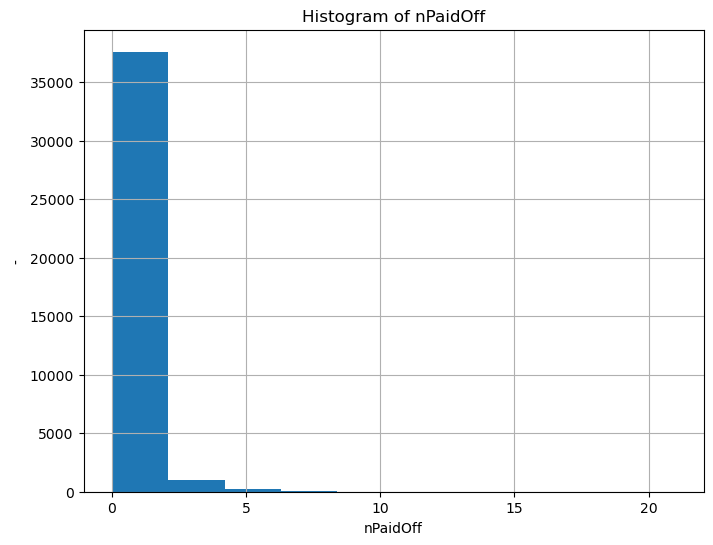

In [658]:
#Histogram for 'nPaidOff'
plt.figure(figsize=(8, 6))
plt.hist(df['nPaidOff'])
plt.title('Histogram of nPaidOff')
plt.xlabel('nPaidOff')
plt.ylabel('-')
plt.grid(True)
plt.show()

From the graph above, we can conclude that almost all the data all gather on 0, hence we will choose mode to fill the nan value for this columns.

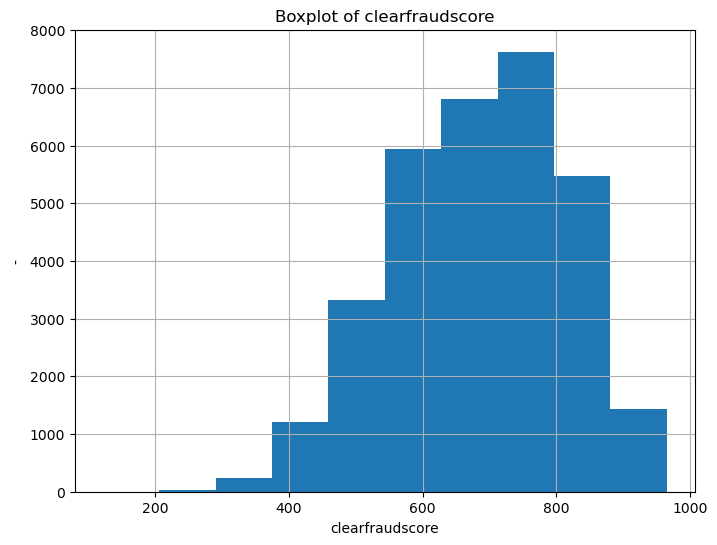

In [659]:
#Histogram for 'clearfraudscore'
plt.figure(figsize=(8, 6))
plt.hist(df['clearfraudscore'])
plt.title('Boxplot of clearfraudscore')
plt.xlabel('clearfraudscore')
plt.ylabel('-')
plt.grid(True)
plt.show()

From the graph above, we can conclude that the clearfraudscore are gather in the range from 400 - 900. Hence, we will choose median to fill the nan value.

In [660]:
# Fill missing values
df.loc[df['clearfraudscore'].isna(), 'clearfraudscore'] = df['clearfraudscore'].median()
df.loc[df['nPaidOff'].isna(), 'nPaidOff'] = df['nPaidOff'].mode()[0]

At first I use the fillna function, but it promt out the setting with copy warning, hence we decided to use loc to fill the nan value to avoi dany ambiguity.

In [661]:
#Check again for nan value exist or not in any column
df.isna().any()

loanId                              False
anon_ssn                            False
payFrequency                        False
apr                                 False
applicationDate                     False
originatedDate                      False
nPaidOff                            False
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
leadType                            False
leadCost                            False
clearfraudscore                     False
dtype: bool

In [662]:
# Convert date columns to datetime objects
df['applicationDate'] = pd.to_datetime(df['applicationDate'], errors='coerce')
df['originatedDate'] = pd.to_datetime(df['originatedDate'], errors='coerce')

In [663]:
#Check again for nan value exist or not in any column
df.isna().any()

loanId                              False
anon_ssn                            False
payFrequency                        False
apr                                 False
applicationDate                      True
originatedDate                       True
nPaidOff                            False
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
leadType                            False
leadCost                            False
clearfraudscore                     False
dtype: bool

From the above, we found that there is missing value after convert the date. Hence, we need to fill in the nan value with mode.

In [664]:
df.loc[df['applicationDate'].isna(), 'applicationDate'] = df['applicationDate'].mode()[0]
df.loc[df['originatedDate'].isna(), 'originatedDate'] = df['originatedDate'].mode()[0]

In [665]:
#Check again for nan value exist or not in any column
df.isna().any()

loanId                              False
anon_ssn                            False
payFrequency                        False
apr                                 False
applicationDate                     False
originatedDate                      False
nPaidOff                            False
loanStatus                          False
loanAmount                          False
originallyScheduledPaymentAmount    False
leadType                            False
leadCost                            False
clearfraudscore                     False
dtype: bool

<h2>Handling Categorical Variables</h2>

In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38982 entries, 1 to 577662
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            38982 non-null  object        
 1   anon_ssn                          38982 non-null  object        
 2   payFrequency                      38982 non-null  object        
 3   apr                               38982 non-null  float64       
 4   applicationDate                   38982 non-null  datetime64[ns]
 5   originatedDate                    38982 non-null  datetime64[ns]
 6   nPaidOff                          38982 non-null  float64       
 7   loanStatus                        38982 non-null  object        
 8   loanAmount                        38982 non-null  float64       
 9   originallyScheduledPaymentAmount  38982 non-null  float64       
 10  leadType                          38982 non-null  

From the above, we notice that few column are in object data type. Hence in this section, we will need to use some function or feature engineering to convert it into machine readable.
<br>
<ul>
    <li><mark>loanId</mark> and <mark>anon_ssn</mark> are unique identifier for the clients, hence we will not need any to categorize it.</li>
        <li><mark>payFrequency</mark> as mention in dictionary, it categorize into 5 type which is B, I, M, S, W. Hence we will apply ordinal encoding into it.</li>
<li><mark>applicationDate</mark> and <mark>originalDate</mark> are the date where the clients start apply on the date and the fund successfully get funded respectively. Hence we will need to calculate the duration of the time taken by creating a new columns to save the time taken for the whole process</li>
        <li><mark>loanStatus</mark> maybe can be used as the target columns and we will need further feature engineering to design on it.</li>
        <li><mark>leadType</mark> has many different type, hence we will apply one-hot encoding to it to where we use the get_dummnies functions to separate it into different columns.
</ul>

In [667]:
# Ordinal encoding
df['payFrequency'] = df['payFrequency'].map({'B': 0, 
                                             'I': 1, 
                                             'M': 2,
                                             'S': 3,
                                             'W': 4})
# One-hot encoding
df = pd.get_dummies(df, columns=['leadType'])

In [668]:
#Display Result
df

loanId                          anon_ssn  payFrequency    apr  \
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c             0  199.0   
15      LL-I-12263369  accf40708233e8b7d05fcb89d5a9c081             0  475.0   
33      LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3             4  645.0   
47      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c             3  490.0   
54      LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc             0  590.0   
...               ...                               ...           ...    ...   
577564  LL-I-12367915  55392b05f72f8c3e32e5157612406ba8             0  565.0   
577590  LL-I-15280684  73690518af906288434b2a0cfd972fe0             2  645.0   
577617  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779             0  449.0   
577653  LL-I-14178923  d9a63e9e15b862fcaaf3653c52e1f16c             0  625.0   
577662  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911             4  645.0   

               applicationDate          originatedDate  nPaidOff  \
1      2016-01-19 22:07:36.778 2016-01-20 15:49:18.846       0.0   
15     2016-11-28 19:54:22.982 2016-11-29 20:30:40.640       2.0   
33     2017-03-01 15:55:41.823 2017-03-01 16:15:13.016       0.0   
47     2017-01-31 17:48:17.381 2017-01-31 18:00:14.520       2.0   
54     2016-08-27 09:08:05.442 2016-08-29 15:05:04.014       0.0   
...                        ...                     ...       ...   
577564 2016-12-01 16:57:49.231 2016-12-01 17:28:21.872       3.0   
577590 2017-01-14 19:43:08.685 2017-01-14 20:00:10.426       0.0   
577617 2016-06-22 01:10:50.110 2016-06-22 21:46:54.359       0.0   
577653 2016-12-30 15:49:39.785 2016-12-30 16:00:12.500       0.0   
577662 2016-12-16 20:20:30.157 2016-12-16 23:15:06.874       0.0   

           loanStatus  loanAmount  originallyScheduledPaymentAmount  ...  \
1       Paid Off Loan      3000.0                           6395.19  ...   
15           New Loan       350.0                            893.88  ...   
33           New Loan       400.0                           1364.87  ...   
47      Paid Off Loan      1250.0                           3313.78  ...   
54      Paid Off Loan       800.0                           2432.08  ...   
...               ...         ...                               ...  ...   
577564  Paid Off Loan       600.0                           1670.18  ...   
577590  Paid Off Loan       375.0                           1042.40  ...   
577617  Paid Off Loan       400.0                            664.12  ...   
577653       New Loan       600.0                           1868.88  ...   
577662  Paid Off Loan       300.0                           1034.38  ...   

        leadType_bvMandatory  leadType_california  leadType_express  \
1                      False                False             False   
15                     False                False             False   
33                     False                False             False   
47                     False                False             False   
54                      True                False             False   
...                      ...                  ...               ...   
577564                 False                False             False   
577590                 False                False             False   
577617                 False                False             False   
577653                 False                False             False   
577662                 False                False             False   

        leadType_instant-offer  leadType_lead  leadType_lionpay  \
1                        False          False             False   
15                       False          False             False   
33                       False           True             False   
47                       False          False             False   
54                       False          False             False   
...                        ...            ...               ...   
57

We notiecd that the one-hot encoding's result to be true or false in dataset, but it is not we want but we want 1 or 0. Hence, we will need to further categorize it.

In [669]:
# Columns to be converted to integers
columns_to_convert = ['leadType_bvMandatory', 
                      'leadType_california', 
                      'leadType_express',
                      'leadType_instant-offer', 
                      'leadType_lead',
                      'leadType_lionpay', 
                      'leadType_organic', 
                      'leadType_prescreen', 
                      'leadType_rc_returning', 
                      'leadType_repeat']

# Convert boolean values to integers for selected columns
df[columns_to_convert] = df[columns_to_convert].astype(int)

From the above, we can see <mark>payFrequency</mark> and, <mark>leadType</mark> had been successfully categorize into its appropriate format.
<br>
Then, we will then proceed on the feature engineering for further extraction.

<h2>Feature Engineering</h2>

On this part, it stand an important role as we will make a <mark>target</mark> as our y to predict whether a loan risk on a given applicant is applicable or not. After exploration of the data and the given task, the target that we will apply is a binary class which is 1 stand for the loan status is done/ paid off where 0 stand for the loan status is charged off where the MoneyLion need to bear with the cost of it.

In [670]:
#Normalized count of unique values in loanStatus
df['loanStatus'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

loanStatus
Paid Off Loan                  29.31%
External Collection            29.07%
New Loan                       20.81%
Internal Collection            14.27%
Returned Item                   3.03%
Settlement Paid Off             1.82%
Settled Bankruptcy              0.83%
Pending Paid Off                0.43%
Charged Off Paid Off            0.41%
Charged Off                     0.00%
Settlement Pending Paid Off     0.00%
Name: proportion, dtype: object

<ul>
    <li><mark>Paid Off Loan</mark>, <mark>New Loan</mark> and <mark>Settlement Paid Off</mark> are indicate that the loan originated and able to generate revenue through interest paymentt and fees by domain knowledge. New Loan may seem not suitable, but without new loan it also hard to predict the pattern of the loan that had been originated. Hence, we include it as 1 also.</li>
    <li><mark>External Collenction</mark>, <mark>Internal Collection</mark>, <mark>Settlement Bankruptcy</mark>, <mark>Charged Off</mark> are indicate that the loan that originatd to the clients did not able to paid back and make a loss on MoneyLion. Hence, these will be indicated as 0 which is nagative to the company's revenue.</li>
    <li>For the others status, it did not contribute as much as the status mentioned above. Hence, it may become a noise and we will drop it.
</ul>

In [671]:
# Map loan status to target (0: Negative/ Loss to MoneyLion, 1: Positive/ revenue to MoneyLion)
def target_encoding(x):
    labels = {0: ['Settled Bankruptcy', 'Charged Off', 'New Loan'],
              1: ['External Collenction', 'Internal Collection', 'Paid Off Loan', 'Settlement Paid Off']}
    for label, status in labels.items():
        if x in status:
            return label
df['target'] = df['loanStatus'].map(target_encoding)
# Drop rows with no target label (implying their status is ongoing)
df = df[df['target'].notna()].reset_index(drop=True)

In [672]:
#Display Result
df['target'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

target
1.0    67.72%
0.0    32.28%
Name: proportion, dtype: object

From the output above, we see that the distribution of 1 and 0 is not balanced. Hence, we will use SMOTE function to balance the dataset in data-preprocessing after we done all the feature engineering.
<br>
We will then drop the column <mark>loanStatus</mark> since we have <mark>target</mark> column.

In [673]:
# Drop columns
df.drop(columns=['loanStatus'], inplace=True)

In [674]:
#Display Result
df

loanId                          anon_ssn  payFrequency    apr  \
0      LL-I-06644937  464f5d9ae4fa09ece4048d949191865c             0  199.0   
1      LL-I-12263369  accf40708233e8b7d05fcb89d5a9c081             0  475.0   
2      LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3             4  645.0   
3      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c             3  490.0   
4      LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc             0  590.0   
...              ...                               ...           ...    ...   
26132  LL-I-12367915  55392b05f72f8c3e32e5157612406ba8             0  565.0   
26133  LL-I-15280684  73690518af906288434b2a0cfd972fe0             2  645.0   
26134  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779             0  449.0   
26135  LL-I-14178923  d9a63e9e15b862fcaaf3653c52e1f16c             0  625.0   
26136  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911             4  645.0   

              applicationDate          originatedDate  nPaidOff  loanAmount  \
0     2016-01-19 22:07:36.778 2016-01-20 15:49:18.846       0.0      3000.0   
1     2016-11-28 19:54:22.982 2016-11-29 20:30:40.640       2.0       350.0   
2     2017-03-01 15:55:41.823 2017-03-01 16:15:13.016       0.0       400.0   
3     2017-01-31 17:48:17.381 2017-01-31 18:00:14.520       2.0      1250.0   
4     2016-08-27 09:08:05.442 2016-08-29 15:05:04.014       0.0       800.0   
...                       ...                     ...       ...         ...   
26132 2016-12-01 16:57:49.231 2016-12-01 17:28:21.872       3.0       600.0   
26133 2017-01-14 19:43:08.685 2017-01-14 20:00:10.426       0.0       375.0   
26134 2016-06-22 01:10:50.110 2016-06-22 21:46:54.359       0.0       400.0   
26135 2016-12-30 15:49:39.785 2016-12-30 16:00:12.500       0.0       600.0   
26136 2016-12-16 20:20:30.157 2016-12-16 23:15:06.874       0.0       300.0   

       originallyScheduledPaymentAmount  leadCost  ...  leadType_california  \
0                               6395.19         0  ...                    0   
1                                893.88         0  ...                    0   
2                               1364.87        40  ...                    0   
3                               3313.78         0  ...                    0   
4                               2432.08        10  ...                    0   
...                                 ...       ...  ...                  ...   
26132                           1670.18         0  ...                    0   
26133                           1042.40        25  ...                    0   
26134                            664.12        40  ...                    0   
26135                           1868.88        25  ...                    0   
26136                           1034.38         6  ...                    0   

       leadType_express  leadType_instant-offer  leadType_lead  \
0                     0                       0              0   
1                     0                       0              0   
2                     0                       0              1   
3                     0                       0              0   
4                     0                       0              0   
...                 ...                     ...            ...   
26132                 0                       0              0   
26133                 0                       0              1   
26134                 0                       0              1   
26135                 0                       0              1   
26136                 0                       0              1   

       leadType_lionpay  leadType_organic  leadType_prescreen  \
0                     0                 0                   1   
1                     0                 1                   0   
2                     0                 0                   0   
3                     0                 1                   0   
4                     0                 0        

Create a new column <mark>time_taken_for_originate</mark>
<br>
After observing the time taken, we found out that the average time is around 1-2 days or even less than 1 days. Hence, it will be better to use hours taken rather than just days.

In [675]:
# Calculate hours between applicationDate & originatedDate
df['time_taken_for_originate'] = (df['originatedDate'] - df['applicationDate']).dt.total_seconds() / 3600

In [676]:
#Display Result
df.describe()

payFrequency           apr                applicationDate  \
count  26137.000000  26137.000000                          26137   
mean       1.382944    523.844138  2016-09-07 03:53:05.450065664   
min        0.000000      0.000000     2014-12-03 00:31:22.306000   
25%        0.000000    390.000000  2016-05-04 05:09:06.764999936   
50%        0.000000    590.000000  2016-12-08 22:34:26.919000064   
75%        3.000000    625.000000  2017-01-24 16:24:55.464999936   
max        4.000000    705.590000     2017-03-18 23:49:05.292000   
std        1.746856    130.358409                            NaN   

                      originatedDate      nPaidOff    loanAmount  \
count                          26137  26137.000000  26137.000000   
mean   2016-09-08 01:52:36.643097344      0.467575    671.108467   
min       2014-12-03 03:12:58.466000      0.000000    100.000000   
25%    2016-05-09 18:51:36.688999936      0.000000    400.000000   
50%    2016-12-09 16:35:39.003000064      0.000000    500.000000   
75%    2017-01-24 22:39:41.851000064      0.000000    800.000000   
max       2017-03-27 20:56:08.598000     21.000000   4687.000000   
std                              NaN      1.170804    498.542594   

       originallyScheduledPaymentAmount      leadCost  clearfraudscore  \
count                      26137.000000  26137.000000     26137.000000   
mean                        1832.435896     12.504572       701.649424   
min                          188.410000      0.000000       177.000000   
25%                         1057.970000      0.000000       636.000000   
50%                         1447.600000      3.000000       693.000000   
75%                         2106.870000     25.000000       780.000000   
max                        16868.150000    200.000000       965.000000   
std                         1341.437318     20.168270       109.865431   

       leadType_bvMandatory  ...  leadType_express  leadType_instant-offer  \
count          26137.000000  ...      26137.000000            26137.000000   
mean               0.347630  ...          0.000574                0.000344   
min                0.000000  ...          0.000000                0.000000   
25%                0.000000  ...          0.000000                0.000000   
50%                0.000000  ...          0.000000                0.000000   
75%                1.000000  ...          0.000000                0.000000   
max                1.000000  ...          1.000000                1.000000   
std                0.476227  ...          0.023950                0.018554   

       leadType_lead  leadType_lionpay  leadType_organic  leadType_prescreen  \
count   26137.000000      26137.000000      26137.000000        26137.000000   
mean        0.340973          0.000383          0.210085            0.032751   
min         0.000000          0.000000          0.000000            0.000000   
25%         0.000000          0.000000          0.000000            0.000000   
50%         0.000000          0.000000          0.000000            0.000000   
75%         1.000000          0.000000          0.000000            0.000000   
max         1.000000          1.000000          1.000000            1.000000   
std         0.474045          0.019557          0.407377            0.177986   

       leadType_rc_returning  leadType_repeat        target  \
count           26137.000000      26137.00000  26137.000000   
mean                0.065731          0.00023      0.677163   
min                 0.000000          0.00000      0.000000   
25%                 0.000000          0.00000      0.000000   
50%                 0.000000          0.00000      1.000000   
75%                 0.000000          0.00000      1.000000   
max                 1.000000          1.00000      1.000000   
std                 0.247815          0.01515      0.467570   

       time_taken_for_originate  
count              26137.000000  
mean                  21.991998  
min               -1

<h2>Data Visualization</h2>

On this part, we will use the numeric features to generate a graph for a details explanation of statistics.

In [677]:
#Create a copy from df
df_visual = df.copy()
#Use the describe function to have a roughly idea on which type of graph is suitable for it.
df_visual[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'clearfraudscore', 'time_taken_for_originate',]].describe()

apr      nPaidOff    loanAmount  \
count  26137.000000  26137.000000  26137.000000   
mean     523.844138      0.467575    671.108467   
std      130.358409      1.170804    498.542594   
min        0.000000      0.000000    100.000000   
25%      390.000000      0.000000    400.000000   
50%      590.000000      0.000000    500.000000   
75%      625.000000      0.000000    800.000000   
max      705.590000     21.000000   4687.000000   

       originallyScheduledPaymentAmount      leadCost  clearfraudscore  \
count                      26137.000000  26137.000000     26137.000000   
mean                        1832.435896     12.504572       701.649424   
std                         1341.437318     20.168270       109.865431   
min                          188.410000      0.000000       177.000000   
25%                         1057.970000      0.000000       636.000000   
50%                         1447.600000      3.000000       693.000000   
75%                         2106.870000     25.000000       780.000000   
max                        16868.150000    200.000000       965.000000   

       time_taken_for_originate  
count              26137.000000  
mean                  21.991998  
std                  586.254214  
min               -18096.884791  
25%                    0.354198  
50%                    2.056761  
75%                   18.348473  
max                17784.478707

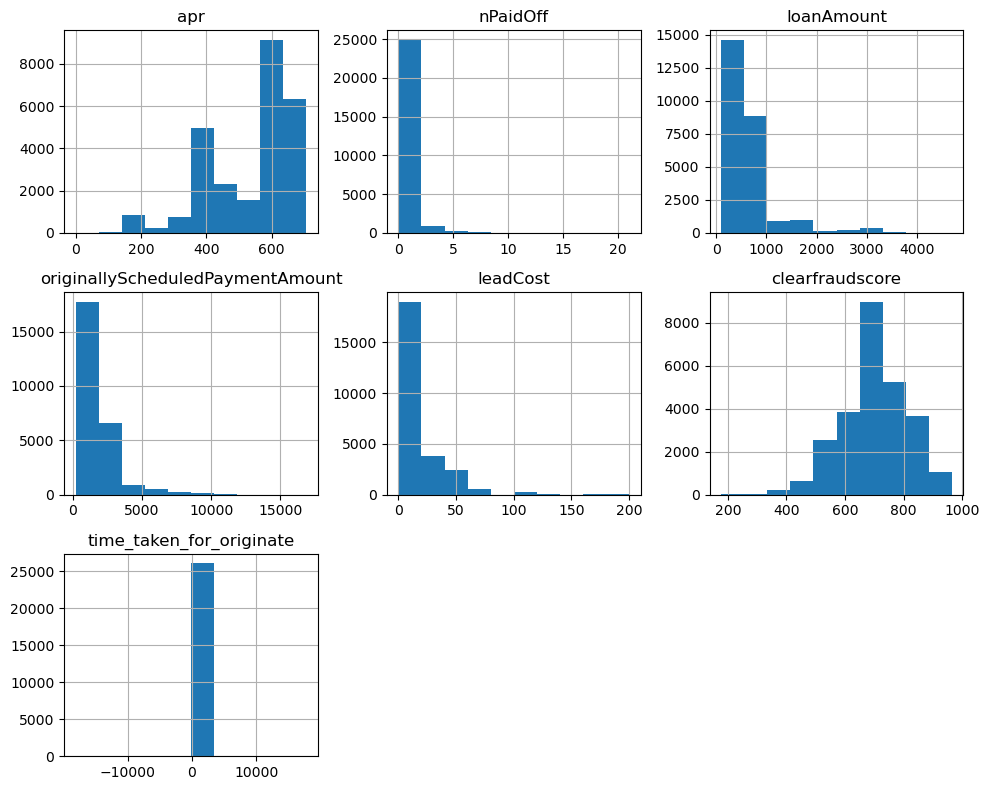

In [678]:
# Histograms
df_visual[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'clearfraudscore', 'time_taken_for_originate',]].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

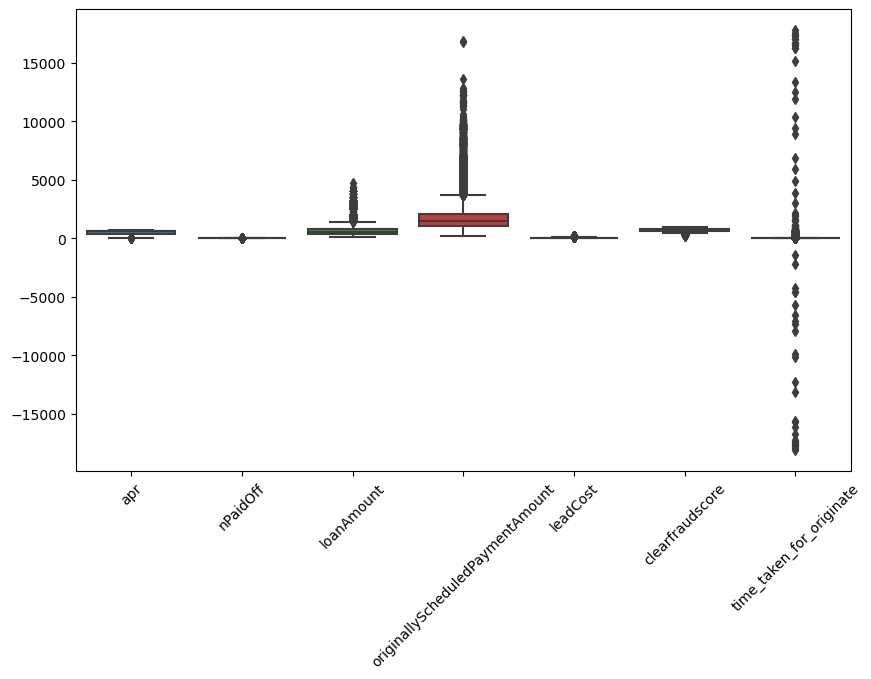

In [679]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_visual[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'clearfraudscore', 'time_taken_for_originate',]])
plt.xticks(rotation=45)
plt.show()

For the graph above, we can see <mark>loadAmount</mark>, <mark>originallyScheduledPaymentAmount</mark>, and <mark>time_taken_for_originate</mark> have many outliers. Hence, we will need apply normalization on it on data-preprocessing step.

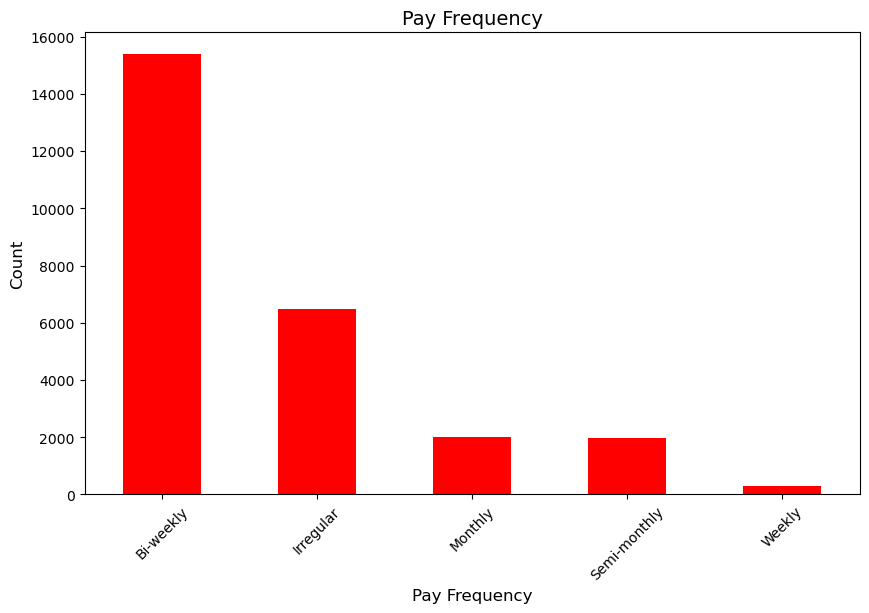

In [680]:
# Grouping the df_visual by 'payFrequency' and calculating the size of each group
pay_frequency_counts = df_visual['payFrequency'].value_counts()

# Plotting the bar plot
pay_frequency_counts.plot(kind='bar', color='red', figsize=(10, 6))

# Adding title and labels
plt.title('Pay Frequency', fontsize=14)
plt.xlabel('Pay Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customizing x-axis tick labels
tick_labels = ['Bi-weekly', 'Irregular', 'Monthly', 'Semi-monthly', 'Weekly']
tick_positions = range(len(tick_labels))
plt.xticks(tick_positions, tick_labels, rotation=45)

# Displaying the plot
plt.show()

From the graph above, we can determine that the pay frequency is normally done by biweekly.

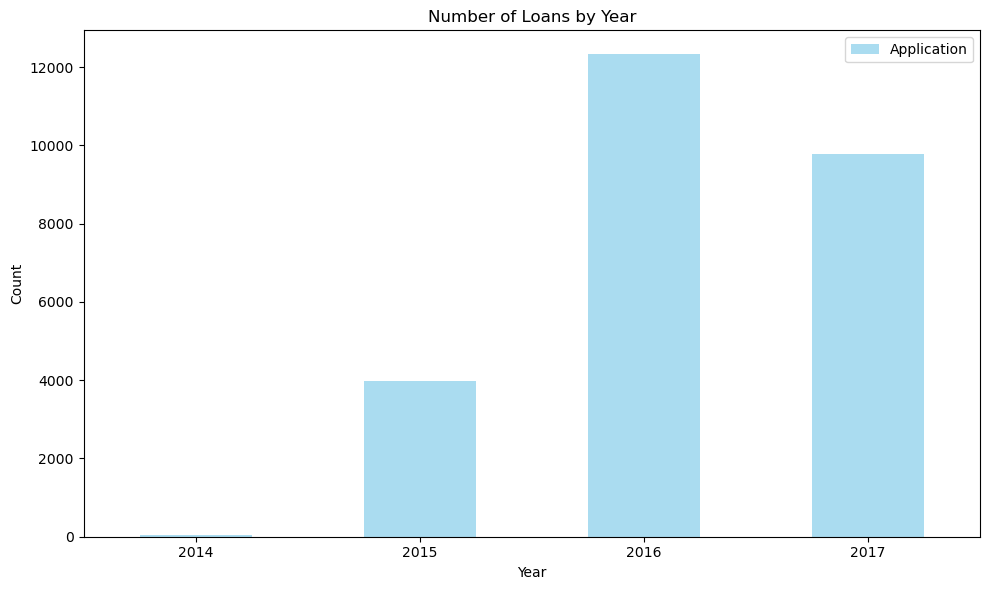

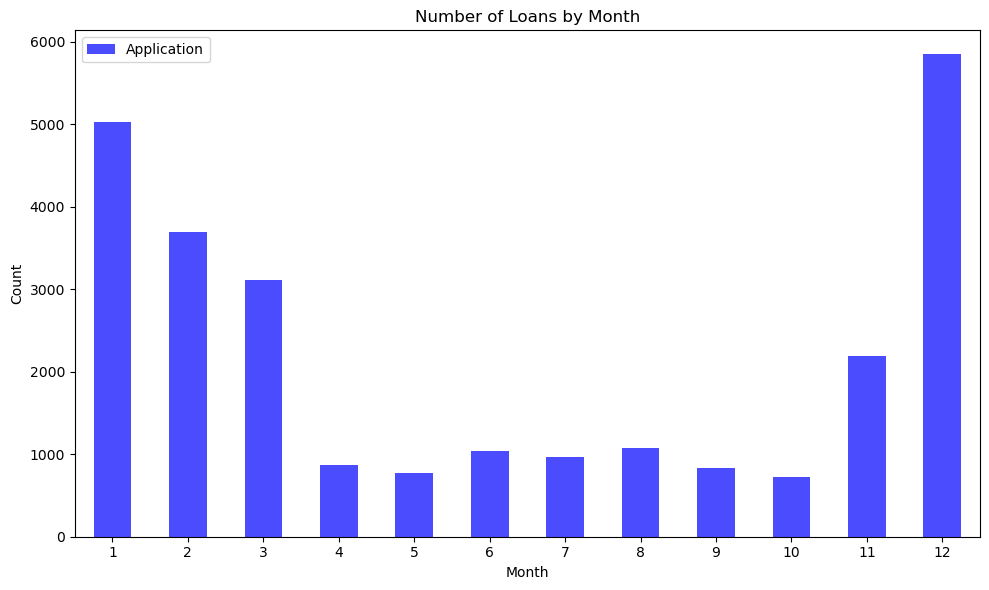

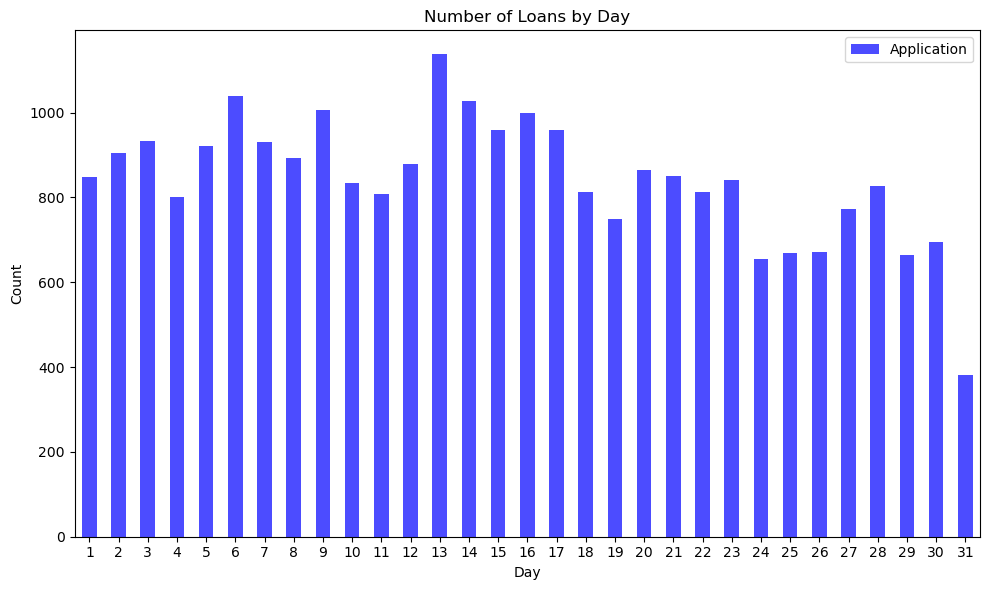

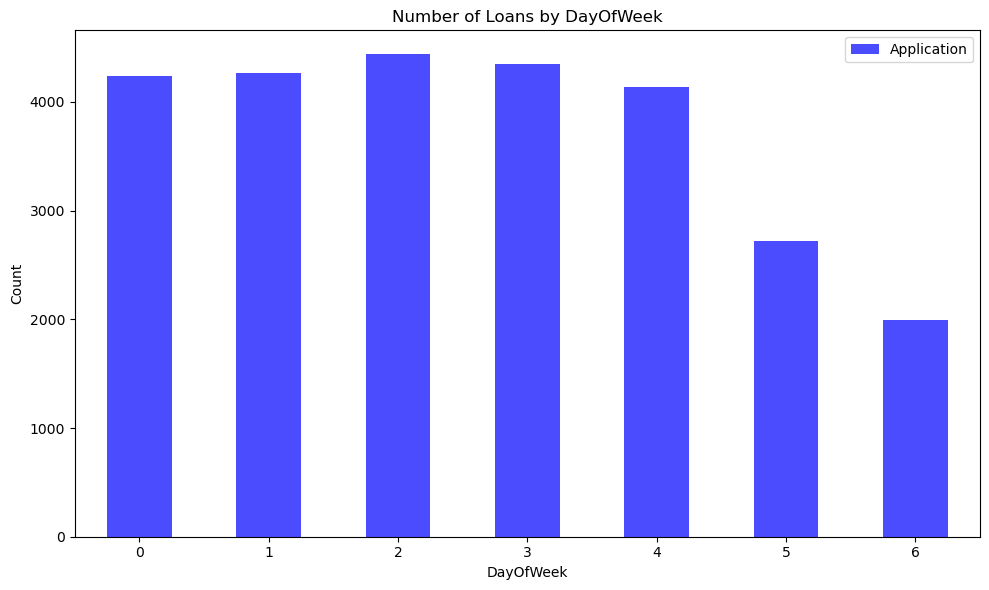

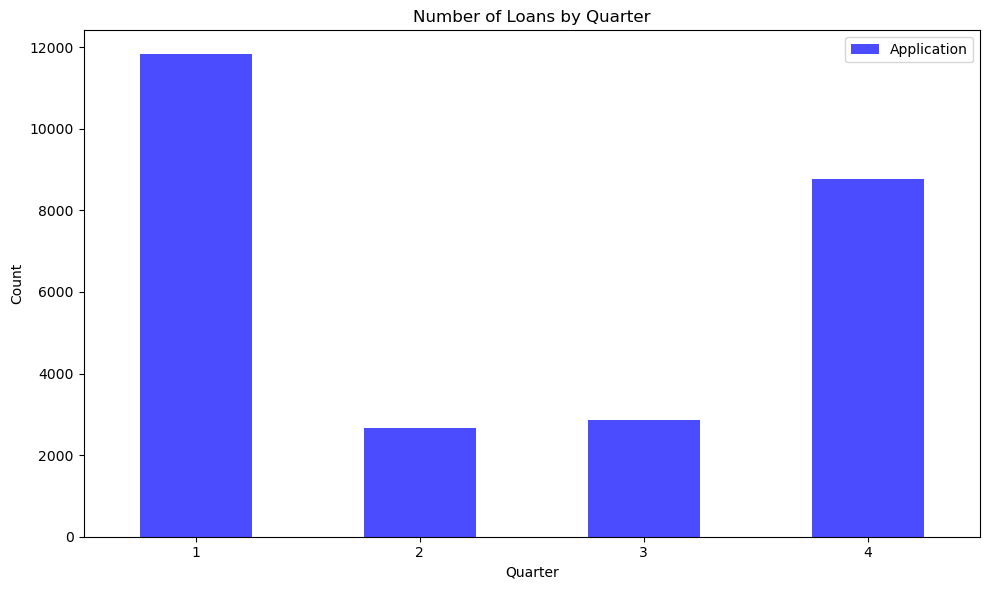

In [681]:
# Extracting components: year, month, day, day of week, and quarter
df_visual['applicationYear'] = df_visual['applicationDate'].dt.year
df_visual['applicationMonth'] = df_visual['applicationDate'].dt.month
df_visual['applicationDay'] = df_visual['applicationDate'].dt.day
df_visual['applicationDayOfWeek'] = df_visual['applicationDate'].dt.dayofweek
df_visual['applicationQuarter'] = df_visual['applicationDate'].dt.quarter

# Visualization for Year
plt.figure(figsize=(10, 6))
df_visual['applicationYear'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7, label='Application')
plt.title('Number of Loans by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization for Month
plt.figure(figsize=(10, 6))
df_visual['applicationMonth'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='Application')
plt.title('Number of Loans by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization for Day
plt.figure(figsize=(10, 6))
df_visual['applicationDay'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='Application')
plt.title('Number of Loans by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization for DayOfWeek
plt.figure(figsize=(10, 6))
df_visual['applicationDayOfWeek'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='Application')
plt.title('Number of Loans by DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization for Quarter
plt.figure(figsize=(10, 6))
df_visual['applicationQuarter'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='Application')
plt.title('Number of Loans by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

From the graph above, we can conclude that on 2014 are not complete which shows almost no clients apply for loan. In the month of January and December, we can said that there is relatively high application from the clients. Whereas, for the dayofweek, we can conclude that mostly of the clients make their application on weekday. Last but not least, most of the clients will make their application on the first and fourth quarter of the year.

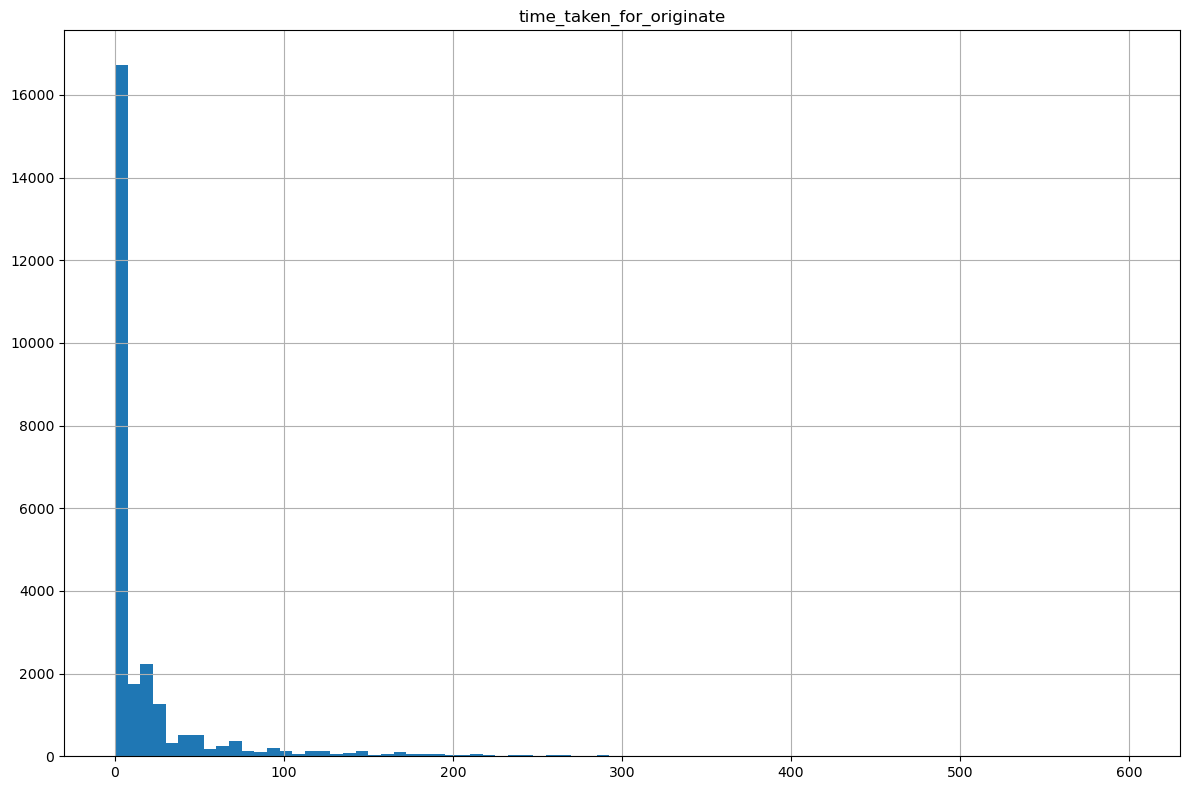

In [682]:
#Visualization on time_taken_for_originate
df_visual[['time_taken_for_originate']].hist(figsize=(12, 8), bins=80, range=(0, 600))
plt.tight_layout()
plt.show()

From the graph above, the <mark>time taken for originate</mark> is heavily skewed where we need to normalizr it during preprocessing,

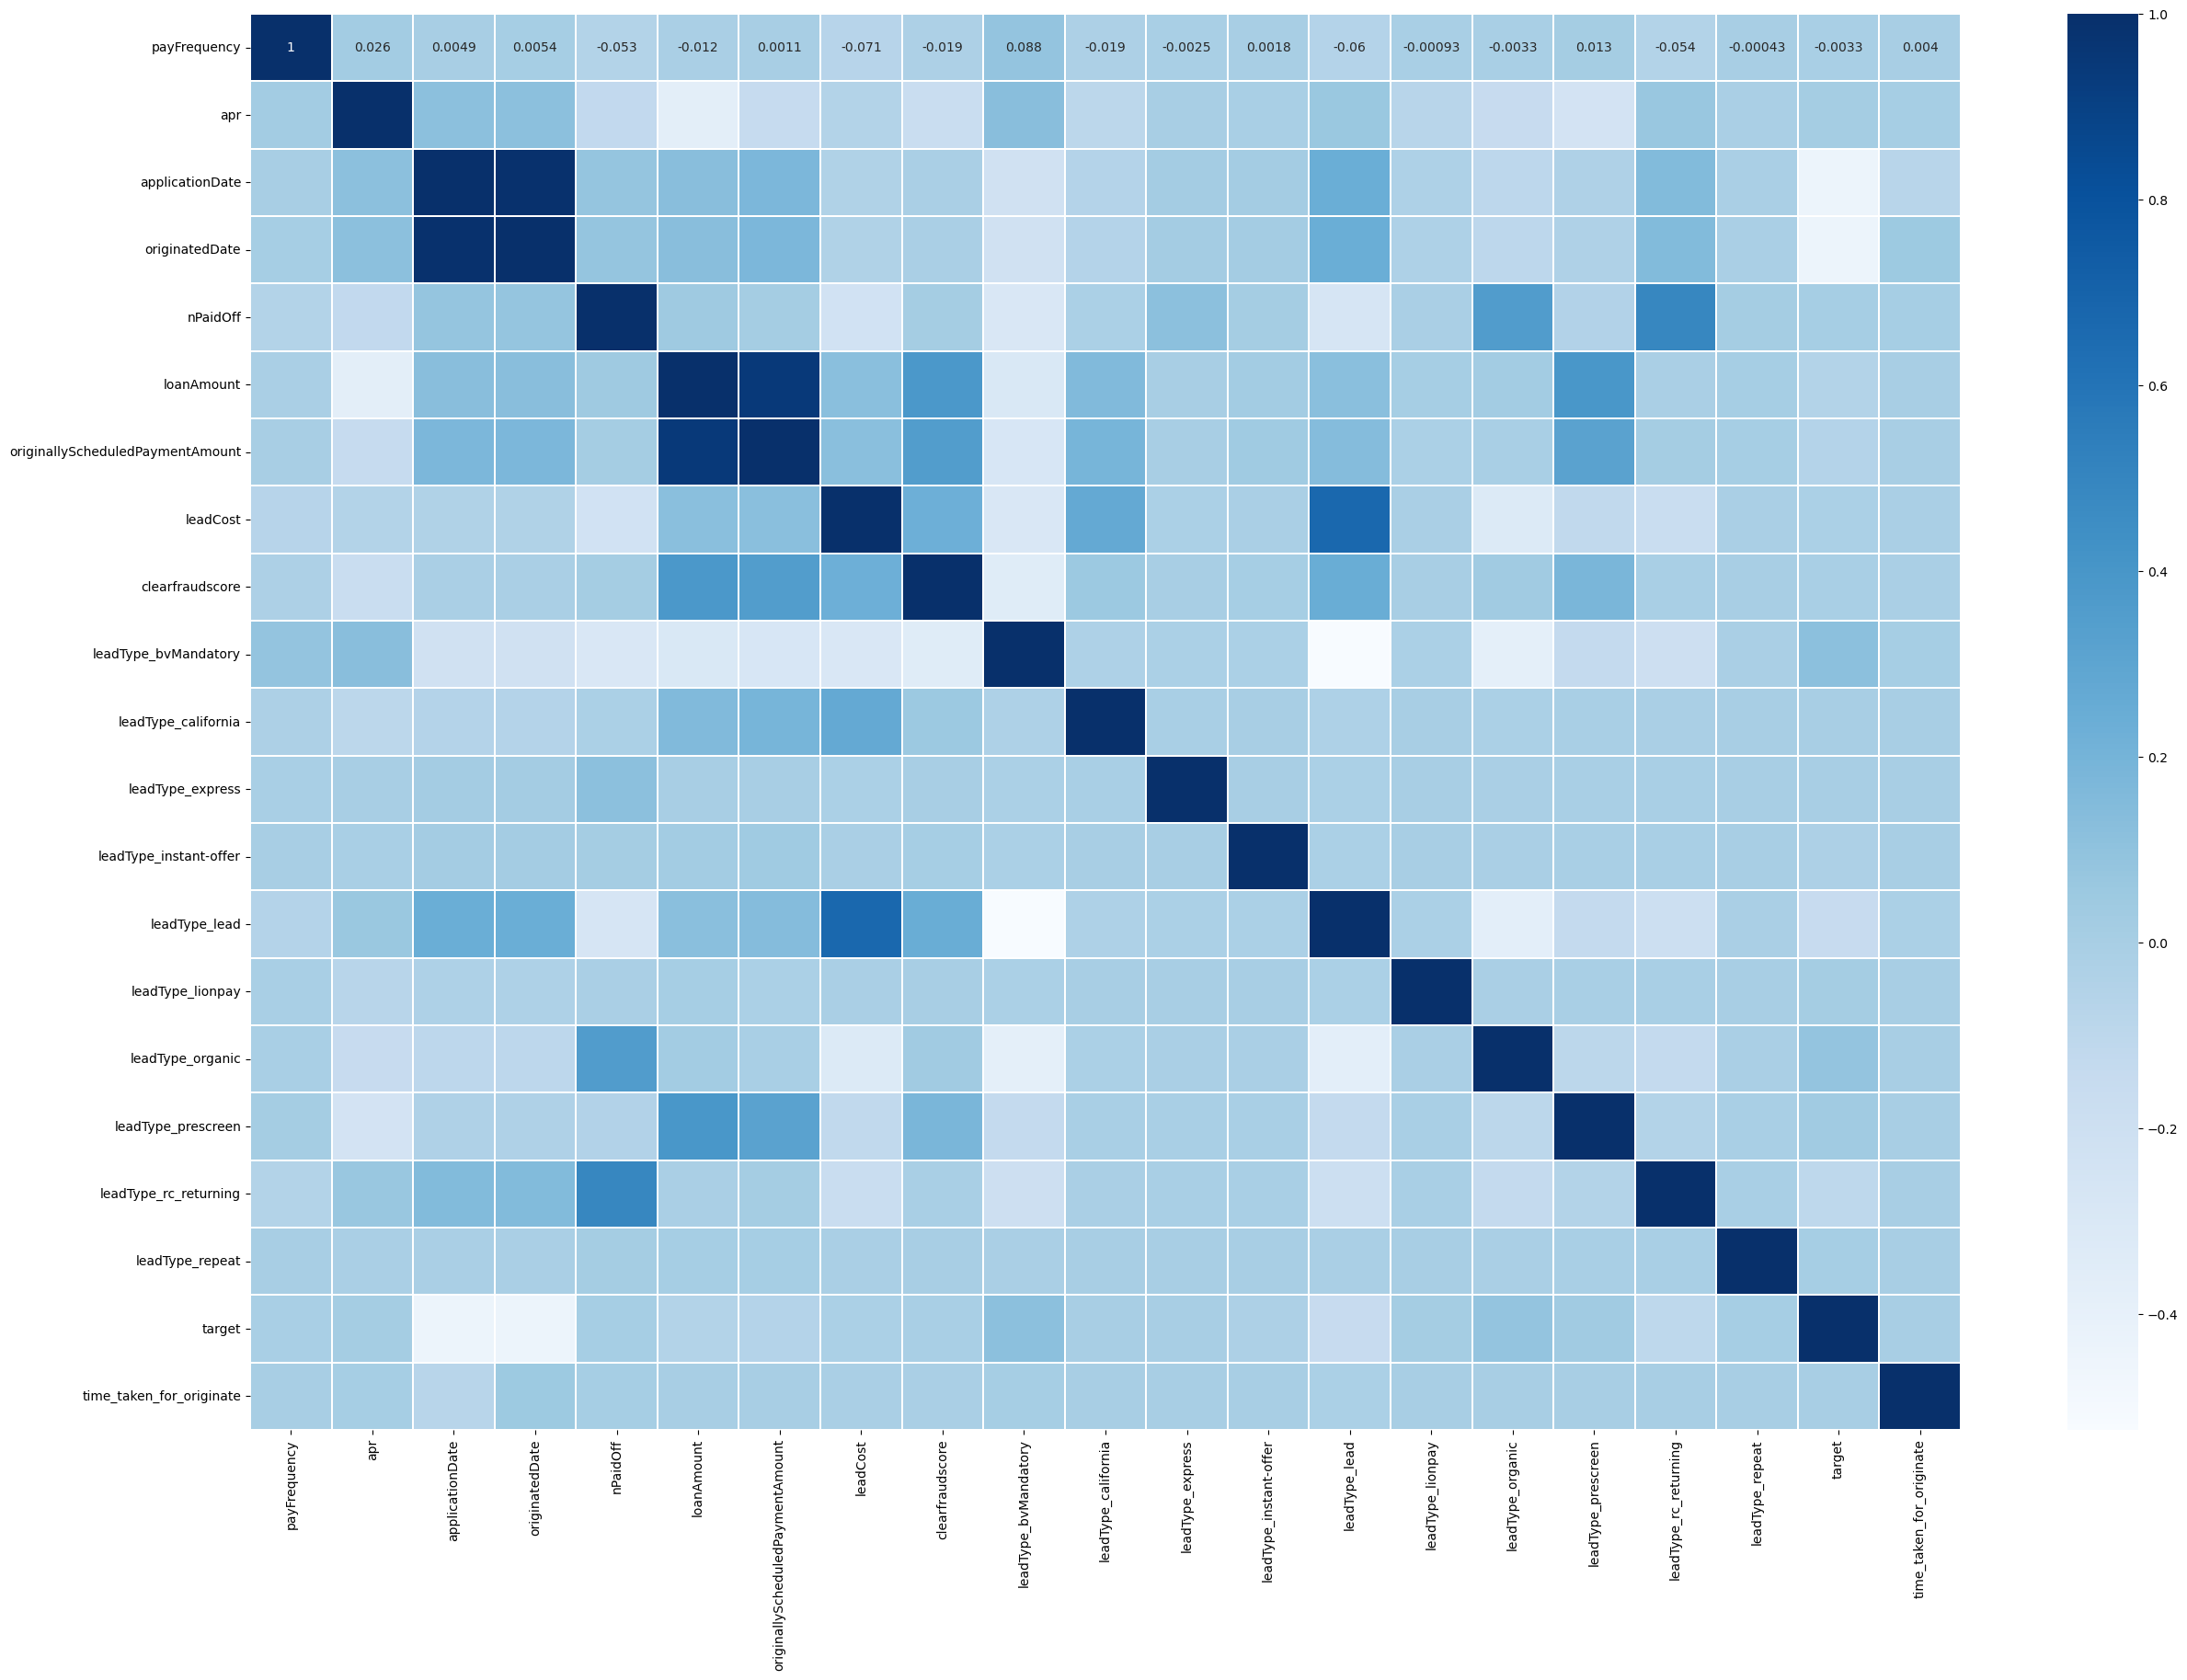

In [683]:
#HeatMap
# Selecting columns starting from the third column onwards
df_subset = df.iloc[:, 2:]
plt.figure(figsize=(30,20))
sns.heatmap(df_subset.corr(),linewidths=0.1,annot=True,cmap='Blues')
plt.show()

From the heatmap a above, we can conclude that the highly correlated features are <mark>originallySchedulePaymentAmount</mark> while the others features did not shows any significantly correlated.

<h2>Pre-Processing</h2>


It is essential for this part because scaling and normalization on the numeric features can prevent the feature dominating others or bias occur. From the above visualization, we need to process <mark>loadAmount</mark>, <mark>originallyScheduledPaymentAmount</mark>, <mark>clearfraudscore</mark>, <mark>nPaidOff</mark>, <mark>apr</mark>, <mark>leadCost</mark> and <mark>time_taken_for_originate</mark>
<br>
We also drop <mark>applicationDate</mark>, and <mark>originatedDate</mark> as we already have the <mark>time taken for originated</mark>
<br>
<ul>
    <li>Apply min-max scalling to <mark>loadAmount</mark>, <mark>originallyScheduledPaymentAmount</mark></li>
    <li>Apply z-score to <mark>clearfraudscore</mark></li>
    <li>Apply box-cox transformation to <mark>clearfraudscore</mark>, <mark>time_taken_for_originate</mark> and <mark>leadCost</mark></li>
    <li>Apply square root transform to <mark>apr</mark>.
<ul>

In [684]:
# Drop irrelevant columns
df.drop(columns=['applicationDate', 'originatedDate'], inplace=True)

In [685]:
# Min-max scaling
scaler = MinMaxScaler()
df[['loanAmount', 'originallyScheduledPaymentAmount', 'time_taken_for_originate']] = scaler.fit_transform(df[['loanAmount', 'originallyScheduledPaymentAmount', 'time_taken_for_originate']])

# Z-score
mean, stdev = df['clearfraudscore'].mean(), df['clearfraudscore'].std()
df['clearfraudscore'] = (df['clearfraudscore'] - mean) / stdev

# Box-cox transformation
cols = ['nPaidOff', 'leadCost']
for col in cols:
    df[col], _ = boxcox(df[col] + 1)

# Square Root transform
df['apr'] = np.sqrt(df['apr'])

In [686]:
#Display Result
features = ['loanAmount', 'originallyScheduledPaymentAmount', 'time_taken_for_originate', 'clearfraudscore', 'nPaidOff', 'leadCost', 'apr']
# Print descriptive statistics
df[features].describe()

loanAmount  originallyScheduledPaymentAmount  \
count  26137.000000                      26137.000000   
mean       0.124506                          0.098564   
std        0.108686                          0.080423   
min        0.000000                          0.000000   
25%        0.065402                          0.052133   
50%        0.087203                          0.075492   
75%        0.152605                          0.115017   
max        1.000000                          1.000000   

       time_taken_for_originate  clearfraudscore      nPaidOff      leadCost  \
count              26137.000000     2.613700e+04  26137.000000  26137.000000   
mean                   0.504966    -7.829372e-17      0.066134      1.496806   
std                    0.016339     1.000000e+00      0.115061      1.185856   
min                    0.000000    -4.775382e+00      0.000000      0.000000   
25%                    0.504363    -5.975440e-01      0.000000      0.000000   
50%                    0.504411    -7.872744e-02      0.000000      1.302112   
75%                    0.504865     7.131504e-01      0.000000      2.818001   
max                    1.000000     2.397029e+00      0.281312      4.203331   

                apr  
count  26137.000000  
mean      22.673049  
std        3.126879  
min        0.000000  
25%       19.748418  
50%       24.289916  
75%       25.000000  
max       26.562944

<h4>Class Imbalance

In [687]:
# Separate the unique identifiers and target variable from the features
X, y = df.drop(['loanId', 'anon_ssn', 'target'], axis=1), df['target']

# Check the class distribution before balancing
print(f'Class distribution before balancing: \n{y.value_counts(normalize=True).apply(lambda x: f"{x * 100:.2f}%")}\n')

# Balance the class distribution using SMOTE
smote = SMOTE(random_state=11)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print(f'Class distribution after balancing: \n{y_resampled.value_counts(normalize=True).apply(lambda x: f"{x * 100:.2f}%")}\n')

Class distribution before balancing: 
target
1.0    67.72%
0.0    32.28%
Name: proportion, dtype: object

Class distribution after balancing: 
target
1.0    50.00%
0.0    50.00%
Name: proportion, dtype: object



<h2>Split Training and Test Dateset</h2

In [688]:
# Split the data into training and testing sets by using 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=11)

We will use ROC-AUC score to choose the most suitable model. Since we had assume it as binary classification task, hence we had choose 4 models to test which perform the best and suitable for the dataset.
<br>
<ul>
    <li>Logistic Regression</li>
    <li>Support Vector Machine</li>
    <li>Random Forest Ensemble</li>
    <li>Multi-Layer Perceptron</li>
</ul>

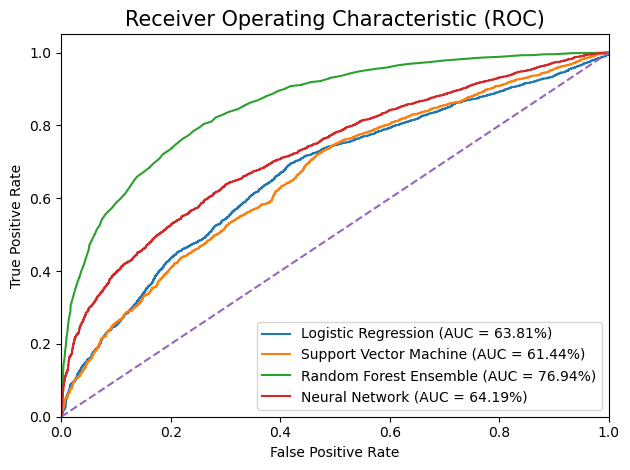

In [689]:
# Initialize models
models = {'Logistic Regression': LogisticRegression(max_iter=1000, 
                                                    n_jobs=-1, 
                                                    random_state=11),
          'Support Vector Machine': SVC(probability=True,
                                        random_state=11),
          'Random Forest Ensemble': RandomForestClassifier(n_jobs=-1, 
                                                           random_state=11),
          'Neural Network': MLPClassifier(max_iter=1000, 
                                          random_state=11)}
for name, model in models.items():
    # Fit models to train 
    model.fit(X_train, y_train)
    # Calculate the false-positive & true-positive rates, and the decision threshold
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    # Plot the resulting ROC graph & calculate AUC    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, model.predict(X_test)) * 100:.2f}%)')
# Customize ROC graph
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc='lower right')
plt.tight_layout()

From the ROC graph above, we can conclude that the Random Forest Ensemble perform the best among the others 3 models. But there is still some fine-tuning needed to increase the score.

<h4>Fine-Tuning</h4>

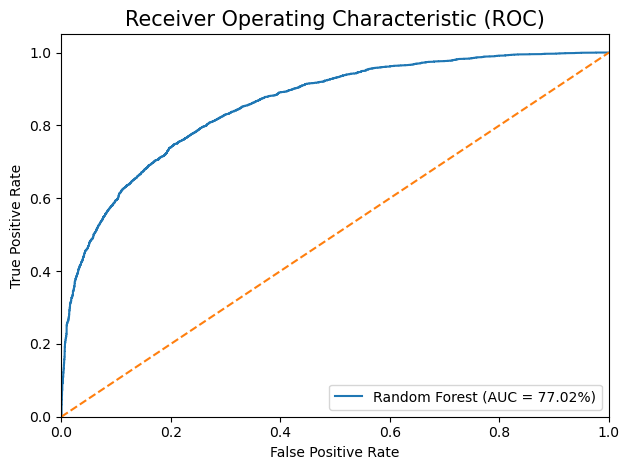

In [690]:
# Initialize RandomForestClassifier
random_forest = RandomForestClassifier(n_jobs=-1, random_state=11)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit RandomForestClassifier with best parameters
best_random_forest = RandomForestClassifier(**best_params, n_jobs=-1, random_state=11)
best_random_forest.fit(X_train, y_train)

# Calculate the false-positive & true-positive rates, and the decision threshold
fpr, tpr, thresholds = roc_curve(y_test, best_random_forest.predict_proba(X_test)[:, 1])

# Plot the resulting ROC graph & calculate AUC
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, best_random_forest.predict(X_test)) * 100:.2f}%)')

# Customize ROC graph
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

After the fine tuning, we succussfully increase the AUC score by 1 percent which is relatively low. But then we decided to stop here as it consume a lot of time to run it and not worth it. 

<h4>Model Evaluation</h4>

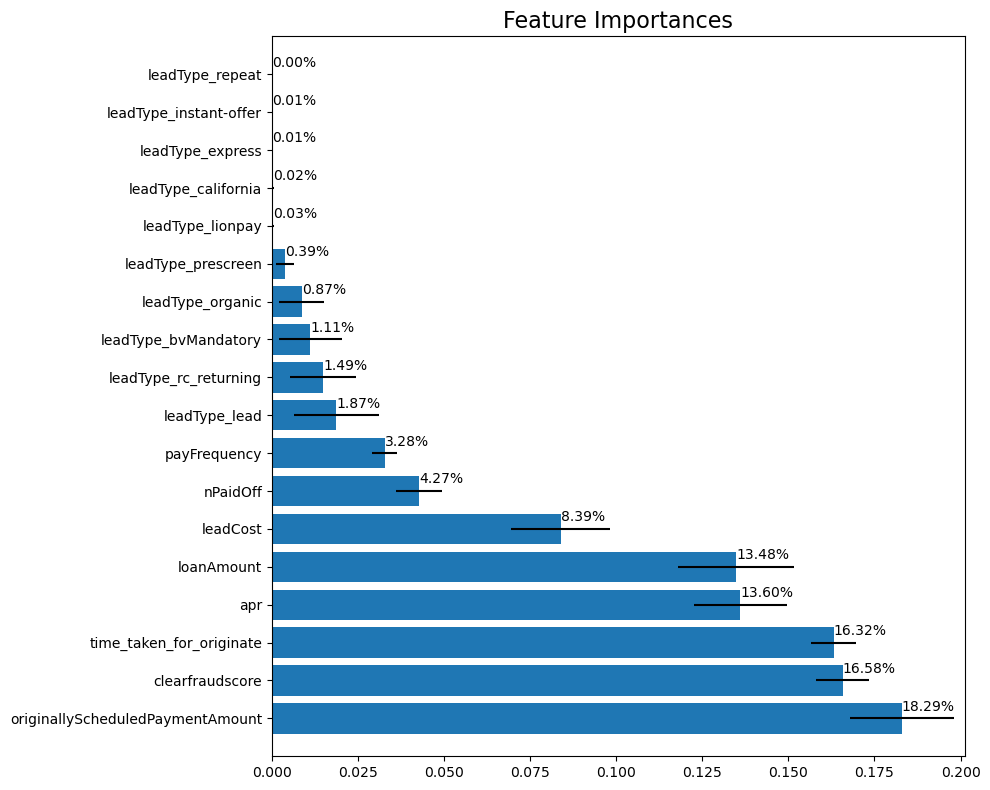

In [691]:
clf = best_random_forest

# Plot feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=16)
plt.barh(range(X.shape[1]), importances[indices], xerr=std[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.xlim(0, max(importances[indices]) * 1.1)
for i, v in enumerate(importances[indices]):
    plt.text(v, i + 0.2, f'{v * 100:.2f}%')
plt.tight_layout()
plt.show()

From the table above, we can conclude that the <mark>originallyScheduledPaymentAmount</mark>, <mark>clearfraudscore</mark>, <mark>time_taken_for_originate</mark>, <mark>apr</mark>, and <mark>loanAmount</mark> stand an important role in the decision making process where 5 of these have the higher percentage compare to the others features.
    

Insights from the graph above:
<ul>
    <li><mark>originallyScheduledPaymentAmount</mark> will be the most important factor can may affect the loan quality/risk. If the clients able to pay off all his schelduled payments, the amount that MoneyLion will becomem revenue/ profit to the company.</li>
    <li><mark>clearfraudscore</mark> will indicate that if the clients has high score, the lower default probability </li>
    <li><mark>time_taken_for_originate</mark> will also affect the loan risk as the fraudscore did because the longer the time took for the loan to be pay to the clients, the higher the risk that the clients not able to pay back. It may because of the clients needts the loan for an emergency, if MoneyLion did not able to pay on time and it may causes the clients bear with the consequences of the emergency even after the loan had been originate.</li>
    <li>For the <mark>apr</mark>, and <mark>loanAmount</mark> also stand an important role because if the apr is low and the loanAmount fulfill the clients needs, the higher the chance that the clients will be able to payback the loan on time.
</ul>

In [712]:
# Export DataFrame to CSV format
df.to_csv('dataset.csv', index=False)

<h2>Conclusion:</h2>

Through the work we did above, we do extracted some key business insights from the data gave by MoneyLion. And in the end we found out that the Random Forest Ensemble with some fine tuning is the most suitable model for this task. But in further work, we think that the fine-tuning can be enhance but due to insufficient time, I only able to run one fine-tuning.
<br>
I hope that the features that extracted above will able to predict the quality and risk of the loan repayment for the clients.

<hr></hr>

<h2>Feeling and Comment:</h2>

First of all, I would like to apologize to PIC of the intern's recruitment because I did not able submit on time and delay for 3 hours because the week I receive this assessment is mid sem examination for me as well and hard to get free time to complete it on time. But it should not be my excuse for submit it late, I hope MoneyLion will still consider my work and feel free to give some comment for my task.
<br>
Through out this task, it let me knows that the pathway of data science is not as easy as we learn during lecture. It is because this is the first time I get involve with real-industry data which is quite hard for me. But I still appreciate MoneyLion for the given task so that I able to expose real-industry's task and enlarge my eyesight towards data scientist's pathway.
<br>
Last but not least, I hope MoneyLion will consider me as an intern as I do love to play with data and enhance my skills in real industry especially MNC company like MoneyLion which will provide more insight and skills for me to learn.
<br>
Thank you and Warm Regards.

<hr></hr>

Notebook runtime: ~25-30 mins
<br>
Time spent: 7days